# Cleaning Data

In [2]:
! pip install pandas
! pip install sklearn

You should consider upgrading via the 'C:\Users\adminn\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
    Running setup.py install for sklearn: started
    Running setup.py install for sklearn: finished with status 'done'


You should consider upgrading via the 'C:\Users\adminn\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [4]:
! pip install matplotlib

You should consider upgrading via the 'C:\Users\adminn\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer


In [36]:
DF_PATH       = "preprocessed_data.pkl"
FEATURES_PATH = "features_skills_clusters.pkl"

ROLE_COLS      = ['DevType']
TECH_COLS      = ['LanguageHaveWorkedWith',
                  'DatabaseHaveWorkedWith',
                  'PlatformHaveWorkedWith',
                  'WebframeHaveWorkedWith',
                  'MiscTechHaveWorkedWith',
                  'ToolsTechHaveWorkedWith',
                  'NEWCollabToolsHaveWorkedWith']
EXCULDE_ROLES = [
    'Other (please specify):',
    'Student',
    'Designer',
    'Educator',
    'Marketing or sales professional',
    'Engineering manager',
    'Senior Executive (C-Suite, VP, etc.)',
    'Product manager',
    'Engineer, site reliability']

EXPORT_PATH    = "2_cleaned_data.pkl"

In [37]:
# Read Data 
processed_df = pd.read_pickle(DF_PATH)
features_df = pd.read_pickle(FEATURES_PATH)

In [38]:
processed_df

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,[I am a developer by profession],"[Independent contractor, freelancer, or self-e...",[Slovakia],[],[],"[Secondary school (e.g. American high school, ...",[18 - 24 years],"[Coding Bootcamp, Other online resources (ex: ...",NaN,...,[25-34 years old],[Man],[No],[Straight / Heterosexual],[White or of European descent],[None of the above],[None of the above],[Appropriate in length],[Easy],62268.0
1,2,[I am a student who is learning to code],"[Student, full-time]",[Netherlands],[],[],"[Bachelor’s degree (B.A., B.S., B.Eng., etc.)]",[11 - 17 years],"[Other online resources (ex: videos, blogs, et...",7.0,...,[18-24 years old],[Man],[No],[Straight / Heterosexual],[White or of European descent],[None of the above],[None of the above],[Appropriate in length],[Easy],NaN
2,3,"[I am not primarily a developer, but I write c...","[Student, full-time]",[Russian Federation],[],[],"[Bachelor’s degree (B.A., B.S., B.Eng., etc.)]",[11 - 17 years],"[Other online resources (ex: videos, blogs, et...",NaN,...,[18-24 years old],[Man],[No],[Prefer not to say],[Prefer not to say],[None of the above],[None of the above],[Appropriate in length],[Easy],NaN
3,4,[I am a developer by profession],[Employed full-time],[Austria],[],[],"[Master’s degree (M.A., M.S., M.Eng., MBA, etc.)]",[11 - 17 years],[],NaN,...,[35-44 years old],[Man],[No],[Straight / Heterosexual],[White or of European descent],[I am deaf / hard of hearing],[],[Appropriate in length],[Neither easy nor difficult],NaN
4,5,[I am a developer by profession],"[Independent contractor, freelancer, or self-e...",[United Kingdom of Great Britain and Northern ...,[],[England],"[Master’s degree (M.A., M.S., M.Eng., MBA, etc.)]",[5 - 10 years],[Friend or family member],17.0,...,[25-34 years old],[Man],[No],[],[White or of European descent],[None of the above],[],[Appropriate in length],[Easy],NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83434,83435,[I am a developer by profession],[Employed full-time],[United States of America],[Texas],[],"[Bachelor’s degree (B.A., B.S., B.Eng., etc.)]",[11 - 17 years],"[Other online resources (ex: videos, blogs, et...",6.0,...,[25-34 years old],[Man],[No],[Straight / Heterosexual],[White or of European descent],[None of the above],[I have a concentration and/or memory disorder...,[Appropriate in length],[Easy],160500.0
83435,83436,[I am a developer by profession],"[Independent contractor, freelancer, or self-e...",[Benin],[],[],"[Bachelor’s degree (B.A., B.S., B.Eng., etc.)]",[11 - 17 years],"[Other online resources (ex: videos, blogs, et...",4.0,...,[18-24 years old],[Man],[No],[Straight / Heterosexual],[Black or of African descent],[None of the above],[None of the above],[Appropriate in length],[Easy],3960.0
83436,83437,[I am a developer by profession],[Employed full-time],[United States of America],[New Jersey],[],"[Secondary school (e.g. American high school, ...",[11 - 17 years],[School],10.0,...,[25-34 years old],[Man],[No],[],[White or of European descent],[None of the above],[None of the above],[Appropriate in length],[Neither easy nor difficult],90000.0
83437,83438,[I am a developer by profession],[Employed full-time],[Canada],[],[],"[Bachelor’s degree (B.A., B.S., B.Eng., etc.)]",[11 - 17 years],"[Online Courses or Certification, Books / Phys...",5.0,...,[25-34 years old],[Man],[No],[Straight / Heterosexual],[White or of European descent],[None of the above],[I have a mood or emotional disorder (e.g. dep...,[Appropriate in length],[Neither easy nor difficult],816816.0


In [39]:
features_df

,skills_group0,skills_group1,skills_group10,skills_group11,skills_group12,skills_group13,skills_group14,skills_group15,skills_group16,skills_group17,...,skills_group21,skills_group22,skills_group23,skills_group3,skills_group4,skills_group5,skills_group6,skills_group7,skills_group8,skills_group9
0,1,0,0,0,0,0,0,0,0,0,...,6,0,0,0,8,0,1,0,0,14
1,0,0,0,0,0,0,0,0,1,5,...,0,1,0,1,4,0,3,3,1,1
2,0,8,8,1,9,0,0,0,0,14,...,0,1,0,0,0,0,0,2,0,1
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,8,0,0,9,0,0
4,0,0,9,1,0,8,0,0,0,12,...,0,3,0,1,8,0,6,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83434,0,0,1,1,0,5,8,0,4,0,...,0,0,0,0,0,0,3,1,1,1
83435,2,0,1,1,1,0,0,0,3,1,...,4,1,0,4,0,1,3,2,1,1
83436,0,0,1,1,0,0,1,0,1,13,...,0,3,4,2,0,0,9,2,9,1
83437,0,0,8,1,0,0,1,0,0,9,...,0,2,0,0,6,0,11,6,0,0


In [40]:
encoded_dfs = {}
for col in ROLE_COLS + TECH_COLS:
    binarizer = MultiLabelBinarizer()
    encoded_df = pd.DataFrame(binarizer.fit_transform(processed_df[col]),
                               columns=binarizer.classes_,
                               index=processed_df[col].index)
    encoded_dfs[col] = encoded_df

# Merge 1-hot encoded
encoded_dfs = pd.concat(encoded_dfs, axis=1)

In [41]:
encoded_dfs


DevType                           \
      Academic researcher Data or business analyst   
0                       0                        0   
1                       0                        0   
2                       0                        0   
3                       0                        0   
4                       0                        0   
...                   ...                      ...   
83434                   0                        0   
83435                   0                        0   
83436                   0                        0   
83437                   0                        0   
83438                   0                        0   

                                                                            \
      Data scientist or machine learning specialist Database administrator   
0                                                 0                      0   
1                                                 0                      0   
2                                                 0                      0   
3                                                 0                      0   
4                                                 0                      0   
...                                             ...                    ...   
83434                                             0                      0   
83435                                             0                      0   
83436                                             1                      0   
83437                                             0                      0   
83438                                             0                      0   

                                                                            \
      Designer DevOps specialist Developer, QA or test Developer, back-end   
0            0                 0                     0                   0   
1            0                 0                     0                   0   
2            0                 0                     0                   0   
3            0                 0                     0                   0   
4            0                 0                     0                   0   
...        ...               ...                   ...                 ...   
83434        0                 0                     0                   1   
83435        0                 0                     0                   0   
83436        0                 1                     0                   0   
83437        0                 0                     0                   1   
83438        0                 0                     0                   1   

                                                     \
      Developer, desktop or enterprise applications   
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 1   
...                                             ...   
83434                                             0   
83435                                             0   
83436                                             0   
83437                                             0   
83438                                             0   

                                                   ...  \
      Developer, embedded applications or devices  ...   
0                                               0  ...   
1                                               0  ...   
2                                               0  ...   
3                                               0  ...   
4                                               0  ...   
...                                           ...  ...   
83434                                           0  ...   
83435                                          

In [42]:
i = np.random.randint(processed_df.shape[0])

# Print original values
print(processed_df.iloc[i][ROLE_COLS].tolist())
print(processed_df.iloc[i][TECH_COLS].tolist())
print("----------------")

# Print processed
print(encoded_dfs.iloc[i][encoded_dfs.iloc[i] == 1])
print("----------------")

# Check clustering 
print("Clusters:",features_df.iloc[i].sum())
print("Skills:",  encoded_dfs[TECH_COLS].iloc[i].sum())

[['Developer, desktop or enterprise applications']]
[['C#'], ['SQLite'], ['Microsoft Azure'], [], [], ['Xamarin'], ['Visual Studio', 'Visual Studio Code']]
----------------
DevType                       Developer, desktop or enterprise applications    1
LanguageHaveWorkedWith        C#                                               1
DatabaseHaveWorkedWith        SQLite                                           1
PlatformHaveWorkedWith        Microsoft Azure                                  1
ToolsTechHaveWorkedWith       Xamarin                                          1
NEWCollabToolsHaveWorkedWith  Visual Studio                                    1
                              Visual Studio Code                               1
Name: 28614, dtype: int32
----------------
Clusters: 13
Skills: 6


In [43]:
for role in EXCULDE_ROLES:
    encoded_dfs = encoded_dfs.drop(("DevType", role), axis=1)

In [44]:
# Check the total samples of roles
original_role_sum = encoded_dfs["DevType"].sum(axis=0)
original_role_sum

Academic researcher                               2899
Data or business analyst                          3792
Data scientist or machine learning specialist     4273
Database administrator                            5655
DevOps specialist                                 7058
Developer, QA or test                             3611
Developer, back-end                              29071
Developer, desktop or enterprise applications    11036
Developer, embedded applications or devices       4598
Developer, front-end                             18231
Developer, full-stack                            32891
Developer, game or graphics                       2112
Developer, mobile                                 9800
Engineer, data                                    4176
Scientist                                         2015
System administrator                              6079
dtype: int64

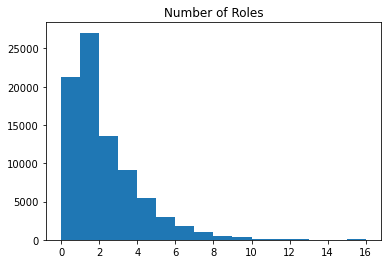

In [45]:
freq_roles = encoded_dfs[ROLE_COLS].sum(axis=1)
plt.hist(freq_roles, freq_roles.max())
plt.title('Number of Roles')
plt.show()

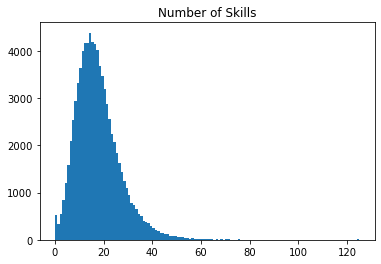

In [46]:
freq_tech = encoded_dfs[TECH_COLS].sum(axis=1)
plt.hist(freq_tech, freq_tech.max())
plt.title('Number of Skills')
plt.show()

In [47]:
ROLES_RANGE = [1,3]
TECH_RANGE  = [3,30]

role_mask   = (freq_roles >= ROLES_RANGE[0]) & (freq_roles <= ROLES_RANGE[1])
tech_mask   = (freq_tech >= TECH_RANGE[0])   & (freq_tech <= TECH_RANGE[1])
filter_mask = role_mask & tech_mask

features_df = features_df.loc[filter_mask].copy()
encoded_dfs = encoded_dfs.loc[filter_mask].copy()
# Check the total samples of roles

cleaned_role_sum = encoded_dfs["DevType"].sum(axis=0)
cleaned_role_sum

Academic researcher                               1708
Data or business analyst                          1658
Data scientist or machine learning specialist     2460
Database administrator                            1210
DevOps specialist                                 3056
Developer, QA or test                             1135
Developer, back-end                              17084
Developer, desktop or enterprise applications     4845
Developer, embedded applications or devices       2138
Developer, front-end                              8932
Developer, full-stack                            20655
Developer, game or graphics                        899
Developer, mobile                                 4751
Engineer, data                                    1941
Scientist                                         1046
System administrator                              2069
dtype: int64

In [48]:
features_df.columns = pd.MultiIndex.from_product([['skills_clusters'], 
                                                  features_df.columns])

In [49]:
df = pd.concat([encoded_dfs, features_df], axis=1)

In [50]:
df.to_pickle(EXPORT_PATH)

## Building Models

In [52]:
! pip install mlflow 


In [53]:
import mlflow


ModuleNotFoundError: No module named 'mlflow'